#**Hand Written Digit Recignition**

###Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

###Preparing Dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("VALIDATION IMAGES: ", val_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (55000, 28, 28, 1)
VALIDATION IMAGES:  (5000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


###Creating Model

In [4]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

### Compiling Model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

### Adding ModelCheckpoint to save the model with best accuracy on val dataset

In [7]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

### Training

In [9]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  batch_size = 64,
  epochs = epochs,
  validation_data=(val_images,val_labels),
  callbacks = [checkpointer]
)

Epoch 1/10
860/860 [==============================] - 11s 5ms/step - loss: 0.4326 - accuracy: 0.8597 - val_loss: 13.3662 - val_accuracy: 0.9738

Epoch 00001: val_loss improved from inf to 13.36615, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 7.0952 - val_accuracy: 0.9874

Epoch 00002: val_loss improved from 13.36615 to 7.09523, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 8.1883 - val_accuracy: 0.9892

Epoch 00003: val_loss did not improve from 7.09523
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 8.4415 - val_accuracy: 0.9878

Epoch 00004: val_loss did not improve from 7.09523
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 7.9629 - val_accuracy:

###Loading The model with best validation accuracy

In [10]:
model.load_weights('model.weights.best.hdf5')

### Visuals of Training Results

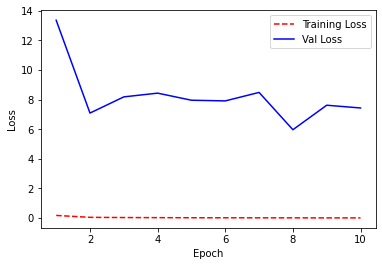

In [12]:
# Get training and test loss histories
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim(bottom=0.15,top = 0.3)
plt.show();

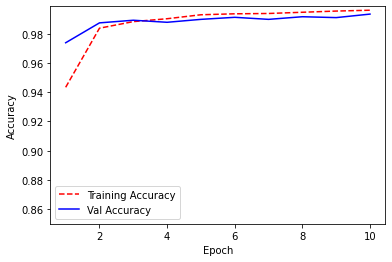

In [13]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(ymin=0.85)
plt.show();

### Testing Image

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction of model: 3


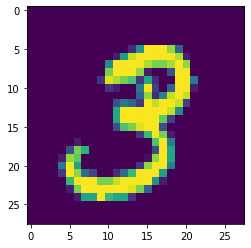

In [14]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

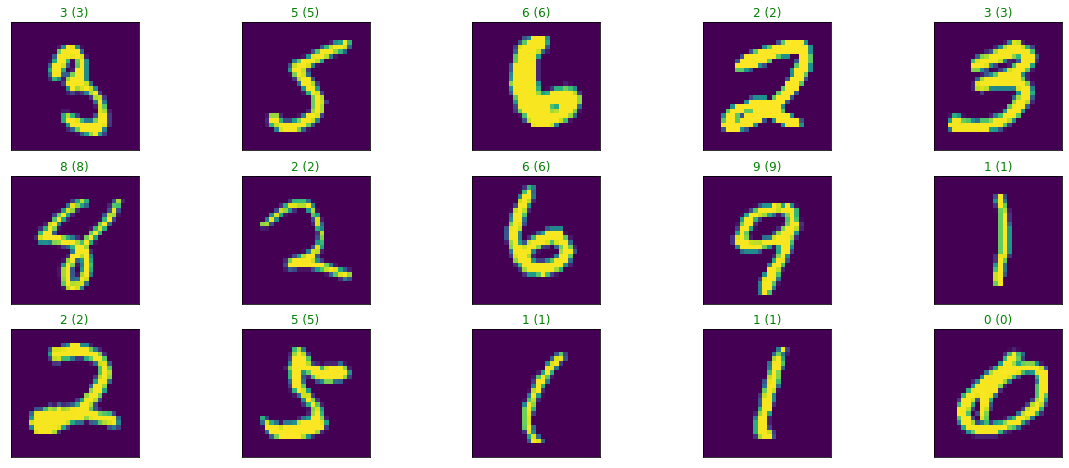

In [29]:
y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green" if predict_index == true_index else "red"))

Model Results

In [30]:
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels)
print("Test loss ={} \nTest accuracy = {}".format(results[0],results[1]*100))

Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9914
Test loss =0.028455056250095367 
Test accuracy = 99.14000034332275


Saving 5.png to 5 (5).png


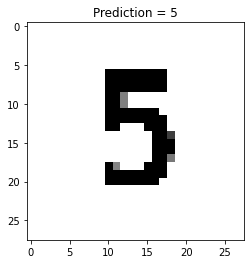

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  images = image.load_img(path, target_size=(28,28))

  x = image.img_to_array(images)
  x = tf.image.rgb_to_grayscale(x)
  x = np.expand_dims(x, axis=0)
  x = x/255.0
  classes = model.predict(x)
  img = mpimg.imread(fn)
  imgplot = plt.imshow(images)
  plt.title("Prediction = {}".format(np.argmax(classes[0])))
  plt.show()

  

Saving the model

In [42]:
model.save("digitrecognition")

INFO:tensorflow:Assets written to: digitrecognition/assets
